<a href="https://colab.research.google.com/github/Rajneesh1109/Mental_health/blob/main/mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
d=pd.read_csv("/content/survey.csv")

In [ ]:
d.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
print(d.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
d.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
d.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


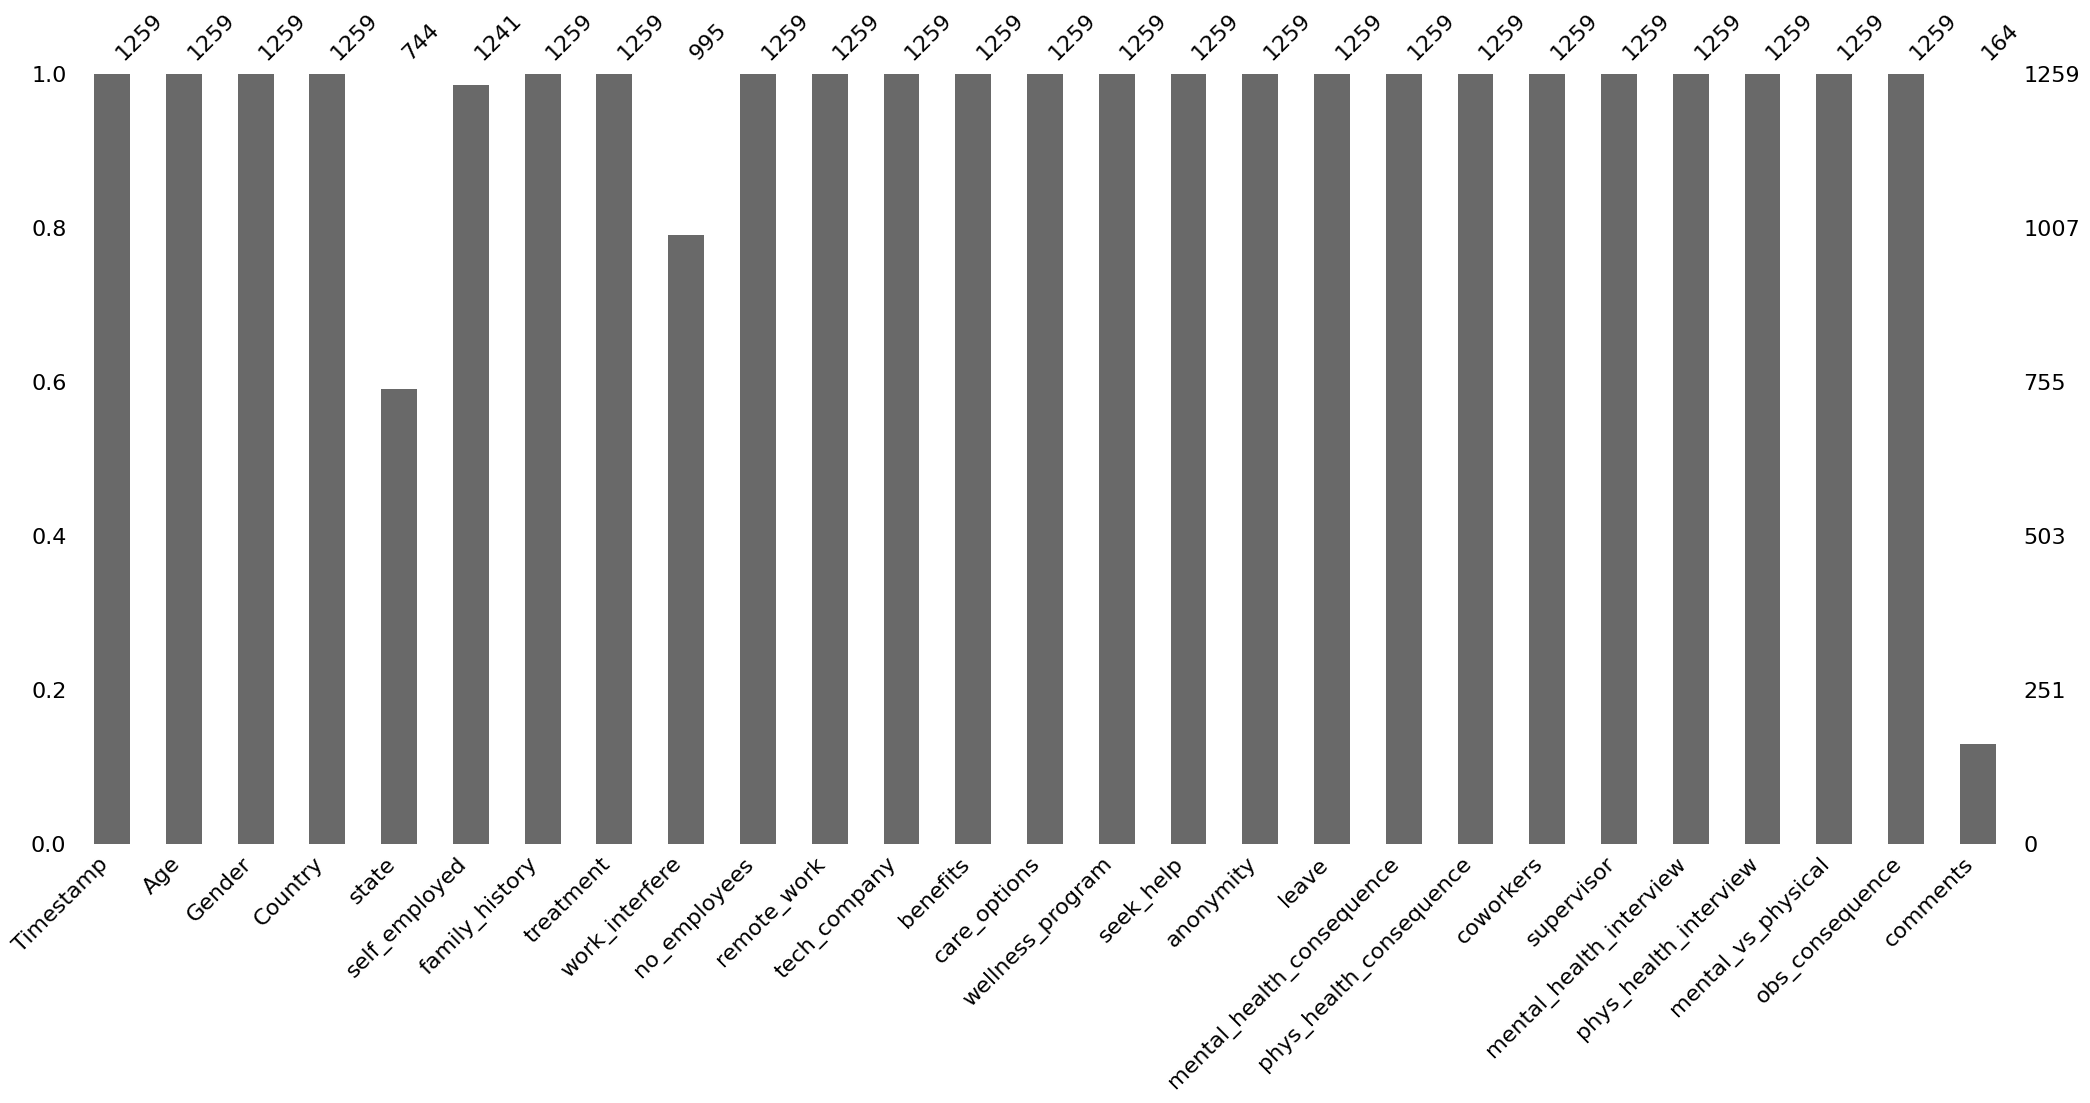

In [ ]:
msno.bar(d)
plt.show()

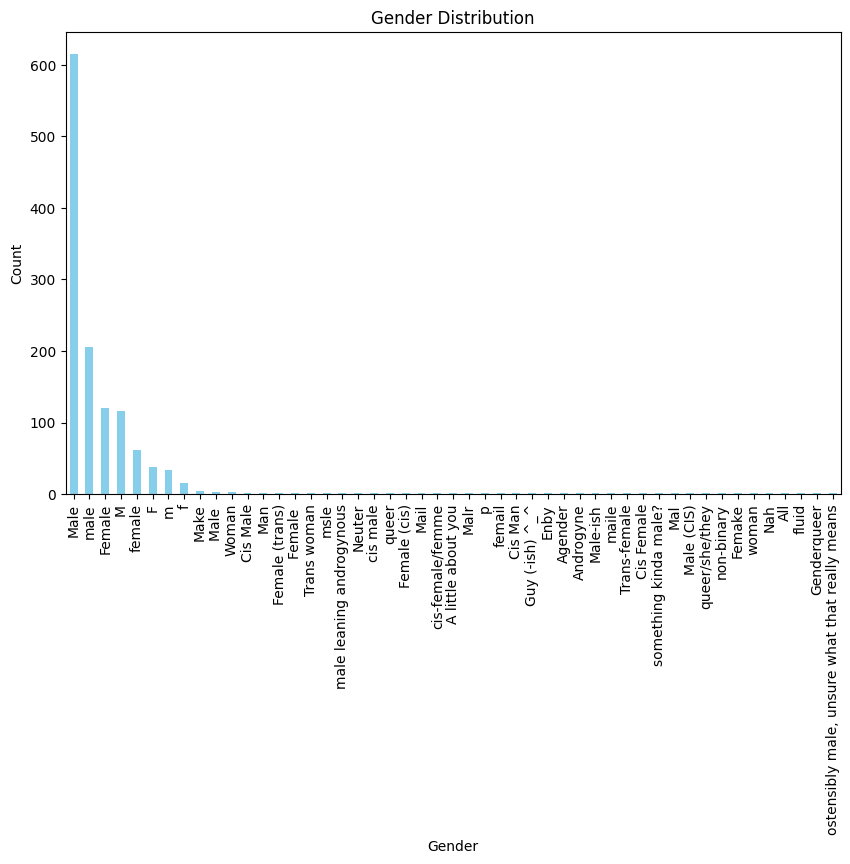

In [ ]:
# Gender distribution
gender_counts = d['Gender'].value_counts()

# Plot with larger figure size and vertical x-axis labels
plt.figure(figsize=(10, 6))  # Set the figure size (width=10, height=6)
gender_counts.plot(kind='bar', title='Gender Distribution', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()


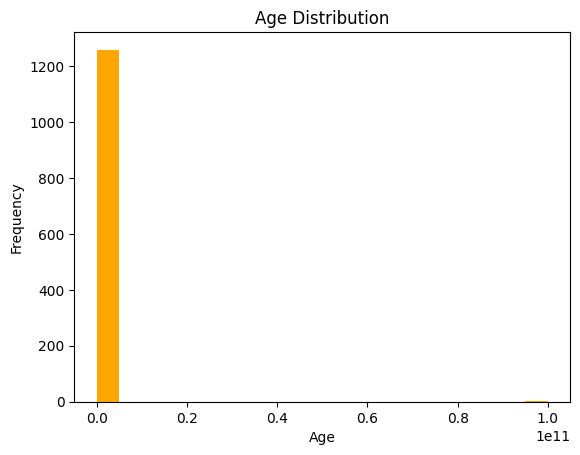

In [ ]:
# Age distribution
d['Age'].plot(kind='hist', bins=20, title='Age Distribution', color='orange')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

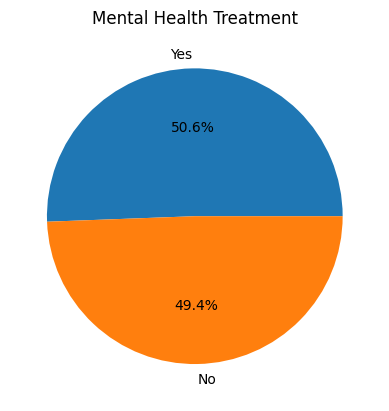

In [ ]:
# Treatment distribution
treatment_counts = d['treatment'].value_counts()

# Plot
treatment_counts.plot(kind='pie', autopct='%1.1f%%', title='Mental Health Treatment')
plt.ylabel('')
plt.show()

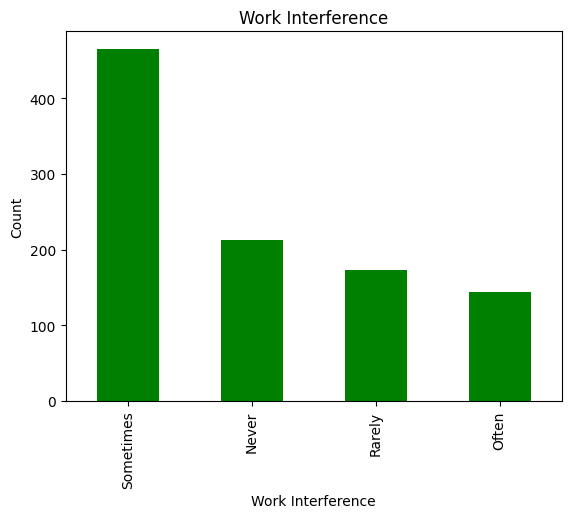

In [ ]:
# Work interfere distribution
interfere_counts = d['work_interfere'].value_counts()

# Plot
interfere_counts.plot(kind='bar', title='Work Interference', color='green')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

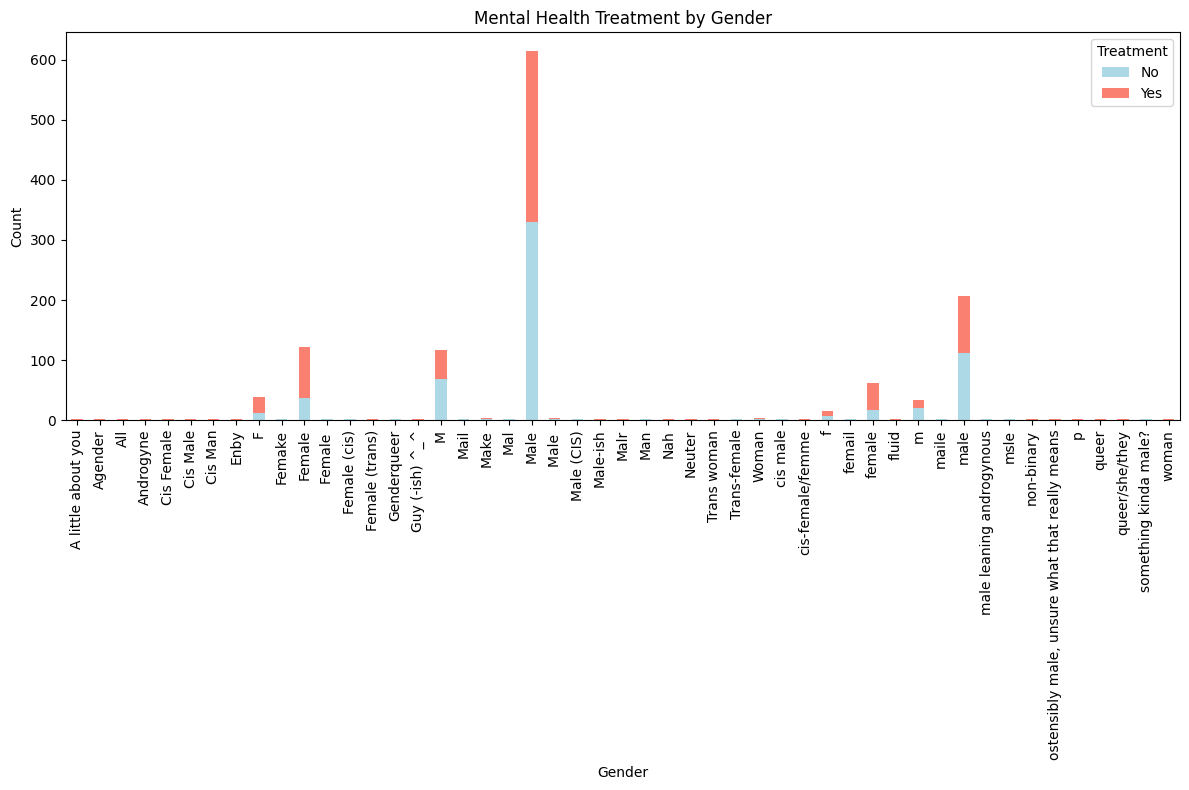

In [ ]:
# Cross-tab of treatment by gender
cross_tab = pd.crosstab(d['Gender'], d['treatment'])

# Plot with larger figure size and vertical x-axis labels
plt.figure(figsize=(12, 8))  # Set the figure size (width=12, height=8)
cross_tab.plot(kind='bar', stacked=True, title='Mental Health Treatment by Gender', color=['lightblue', 'salmon'], figsize=(12, 8))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.legend(title='Treatment')  # Add legend title for clarity
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



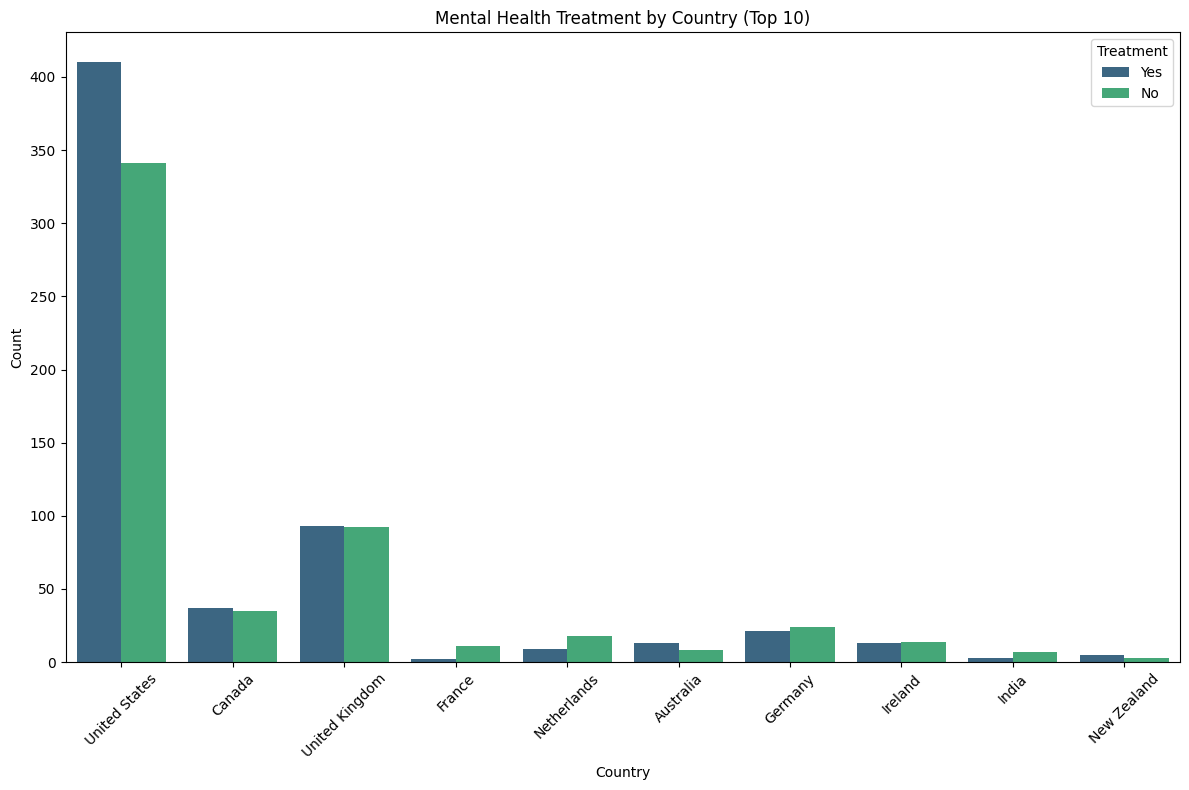

In [ ]:
# Treatment by country
treatment_by_country = d['Country'].value_counts().head(10)  # Top 10 countries for clarity

plt.figure(figsize=(12, 8))
sns.countplot(data=d[d['Country'].isin(treatment_by_country.index)], x='Country', hue='treatment', palette='viridis')
plt.title('Mental Health Treatment by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()


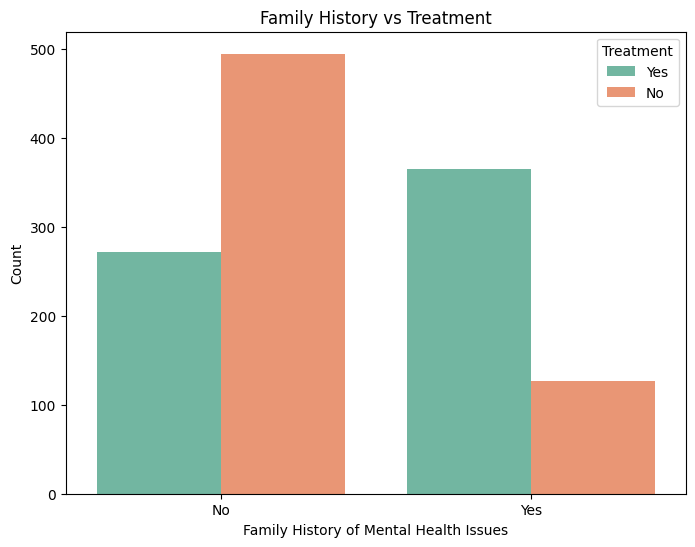

In [ ]:
# Family history vs treatment
plt.figure(figsize=(8, 6))
sns.countplot(data=d, x='family_history', hue='treatment', palette='Set2')
plt.title('Family History vs Treatment')
plt.xlabel('Family History of Mental Health Issues')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


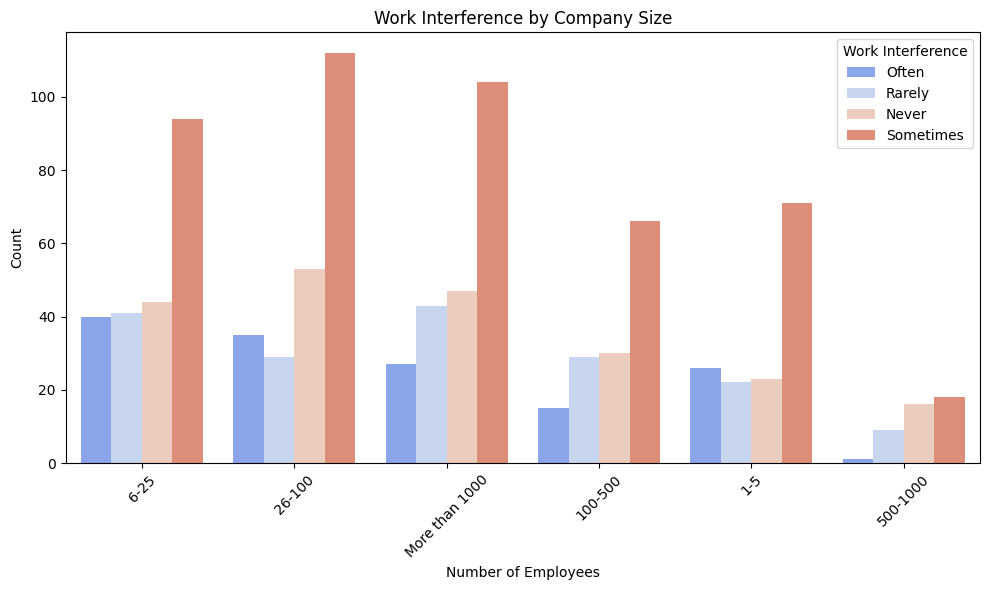

In [ ]:
# Work interference vs company size
plt.figure(figsize=(10, 6))
sns.countplot(data=d, x='no_employees', hue='work_interfere', palette='coolwarm', order=d['no_employees'].value_counts().index)
plt.title('Work Interference by Company Size')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Work Interference')
plt.tight_layout()
plt.show()


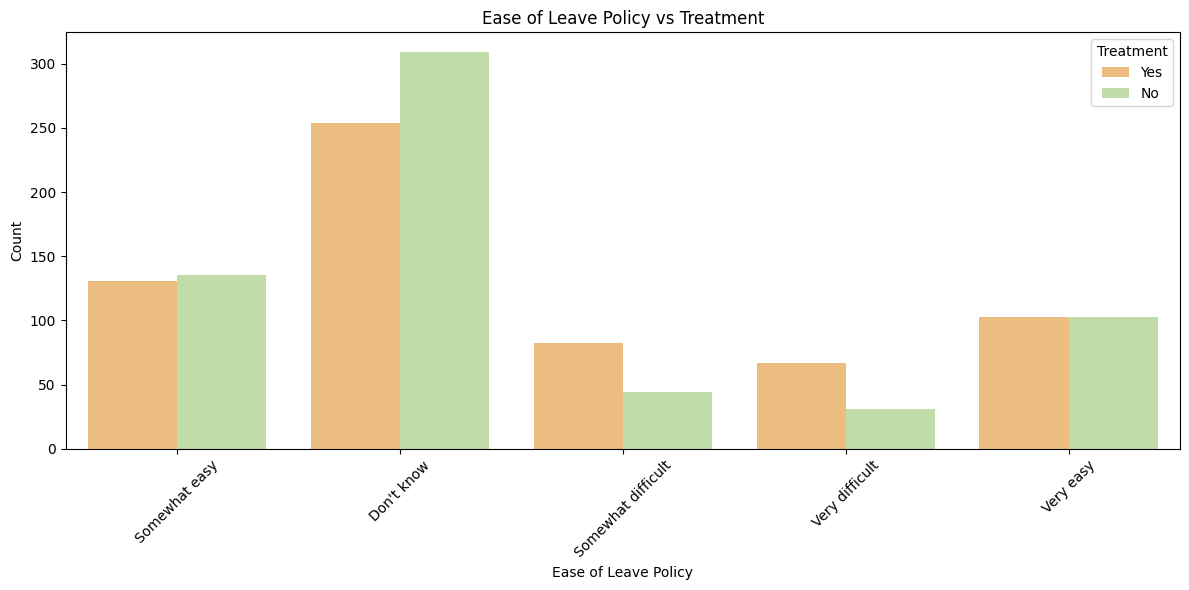

In [ ]:
# Leave policy ease vs treatment
plt.figure(figsize=(12, 6))
sns.countplot(data=d, x='leave', hue='treatment', palette='Spectral')
plt.title('Ease of Leave Policy vs Treatment')
plt.xlabel('Ease of Leave Policy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()


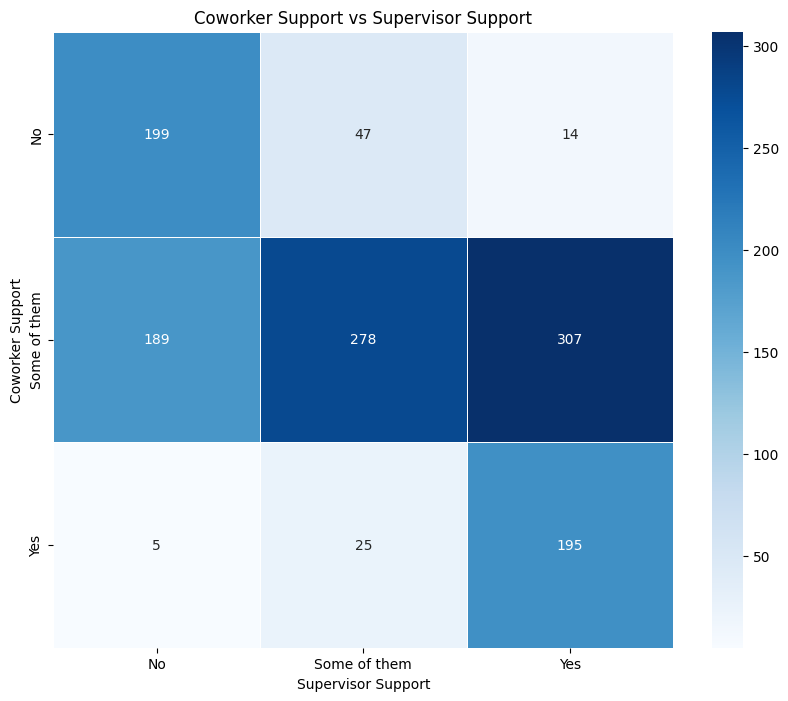

In [ ]:
# Cross-tab of coworker and supervisor support
support_tab = pd.crosstab(d['coworkers'], d['supervisor'])

plt.figure(figsize=(10, 8))
sns.heatmap(support_tab, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Coworker Support vs Supervisor Support')
plt.xlabel('Supervisor Support')
plt.ylabel('Coworker Support')
plt.show()

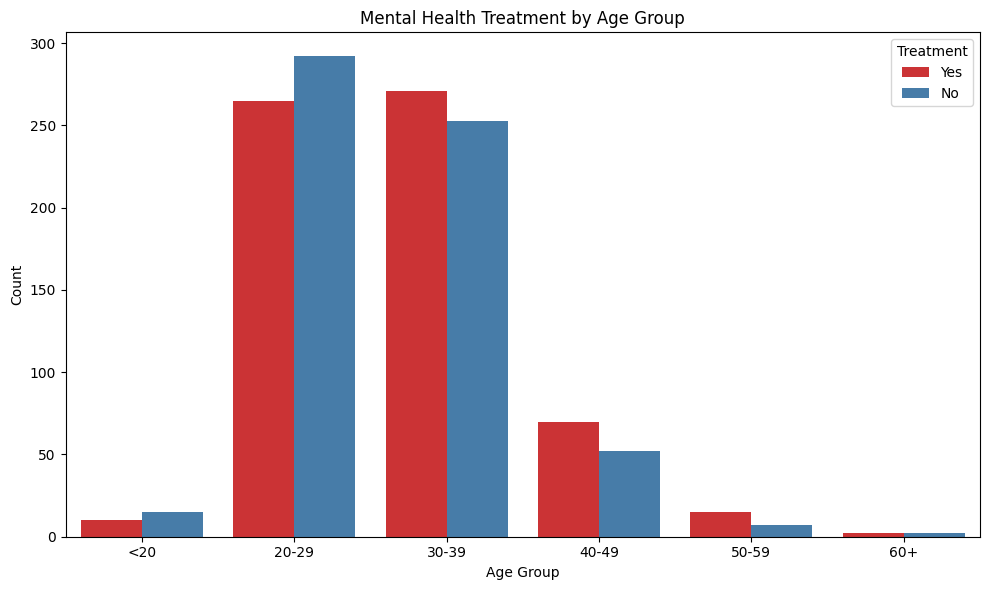

In [ ]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
d['Age_Group'] = pd.cut(d['Age'], bins=bins, labels=labels)

# Age group vs treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=d, x='Age_Group', hue='treatment', palette='Set1')
plt.title('Mental Health Treatment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()


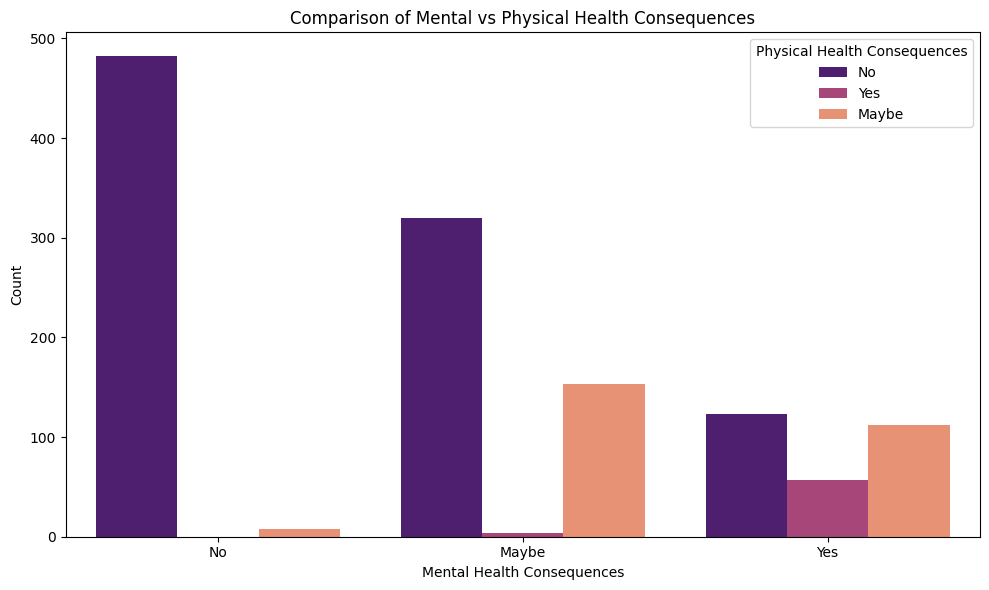

In [ ]:
# Mental vs physical health consequences
plt.figure(figsize=(10, 6))
sns.countplot(data=d, x='mental_health_consequence', hue='phys_health_consequence', palette='magma')
plt.title('Comparison of Mental vs Physical Health Consequences')
plt.xlabel('Mental Health Consequences')
plt.ylabel('Count')
plt.legend(title='Physical Health Consequences')
plt.tight_layout()
plt.show()


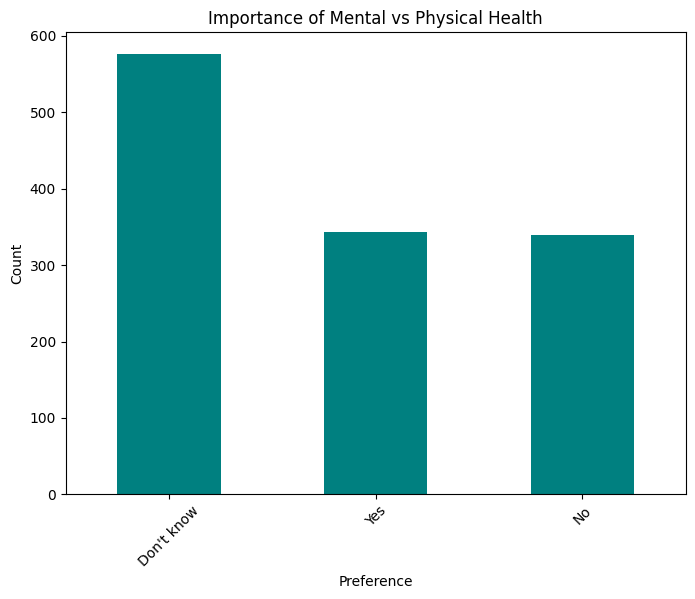

In [ ]:
# Mental vs physical health perception
mental_vs_physical_counts = d['mental_vs_physical'].value_counts()

plt.figure(figsize=(8, 6))
mental_vs_physical_counts.plot(kind='bar', color='teal')
plt.title('Importance of Mental vs Physical Health')
plt.xlabel('Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


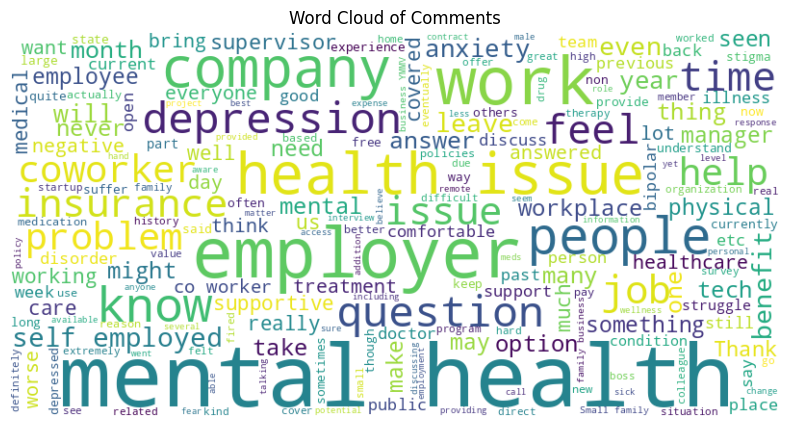

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud for comments
comments_text = ' '.join(str(comment) for comment in d['comments'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()
